In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
import numpy as np

from sklearn.ensemble import RandomForestClassifier

In [2]:
# Import dataset
load_dotenv()
# Load X and y splits
x_train_path = os.getenv("X_TRAIN_MERGED_SCALED")
x_test_path  = os.getenv("X_TEST_MERGED_SCALED")
y_train_path = os.getenv("Y_TRAIN_MERGED_SCALED")
y_test_path  = os.getenv("Y_TEST_MERGED_SCALED")

X_train = pd.read_csv(x_train_path)
X_test  = pd.read_csv(x_test_path)
y_train = pd.read_csv(y_train_path)
y_test  = pd.read_csv(y_test_path)

# Optional: quick check
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(875, 23) (875, 1)
(376, 23) (376, 1)


In [3]:
X_train

,RID,Gender,Ageatscreening,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,30724,1,68.766600,30.0,0.439372,0.449830,-0.310769,-0.057975,-0.347856,-0.448372,...,-0.616233,-1.553987,-3.014887,1.341362,-2.506142,-0.072538,1.729962,-0.257601,0.188973,0.441671
1,973,0,76.923300,28.0,-0.897787,-0.704627,-0.417065,-0.823577,0.808385,-0.763564,...,-0.676678,0.088476,-1.245864,0.277013,-0.829339,0.125996,1.215330,-0.697663,1.243319,0.869884
2,30048,0,60.120464,29.0,0.844165,-0.659601,0.532557,-1.266330,-0.851072,-0.733375,...,-1.120482,0.738036,-0.860691,-0.900840,-0.218100,-0.526256,-0.676533,0.500947,0.711024,0.206708
3,30950,1,65.242980,29.0,0.448514,-0.783976,0.730526,0.568220,0.201516,1.262269,...,-0.495325,0.672895,0.570455,-0.162415,0.796400,0.669228,-0.443779,0.994111,0.359644,2.079358
4,31104,1,53.174538,29.0,-1.186722,-0.320633,0.887091,2.114615,1.317801,2.453484,...,-0.921515,0.985687,0.093213,0.076339,0.572736,1.275942,-0.269289,1.446447,-0.046236,0.114960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,1168,1,81.282200,29.0,-0.248488,-0.027023,0.888073,0.662068,0.265437,0.765040,...,1.300998,-0.750174,1.595055,0.454051,0.916475,0.608826,-0.359318,1.109268,-0.068742,0.991036
871,1121,1,56.254800,24.0,-1.148761,0.308420,NaN,-1.567693,1.444640,-1.838439,...,-0.453973,0.220467,-0.466099,0.916348,-0.153850,1.358527,1.261897,1.109268,-0.280158,0.429740
872,30404,1,63.534565,26.0,0.004421,0.138551,-0.058230,-0.599736,-0.017667,-0.736988,...,-0.245620,0.316113,0.020680,-0.807918,0.148746,-0.202100,-0.735200,-0.247931,-0.548208,-0.778206
873,30995,1,58.491444,30.0,-1.103475,0.521710,0.147755,1.949610,1.617563,1.555780,...,-0.769378,0.698120,-0.234244,0.313983,0.185186,1.443140,0.059937,0.914603,1.012206,1.337187


In [4]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    random_state=42,
)

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(),
    random_state=42,
)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(),
    random_state=42,
)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(),
    random_state=42,
)

In [5]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)

imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

IterativeImputer(estimator=ExtraTreesRegressor(), random_state=42)

In [6]:
# replace NA
X_train_bayes = imputer_bayes.transform(X_train)
X_test_bayes = imputer_bayes.transform(X_test)

X_train_knn = imputer_knn.transform(X_train)
X_test_knn = imputer_knn.transform(X_test)

X_train_nonLin = imputer_nonLin.transform(X_train)
X_test_nonLin = imputer_nonLin.transform(X_test)

X_train_missForest = imputer_missForest.transform(X_train)
X_test_missForest = imputer_missForest.transform(X_test)

In [7]:
X_train_bayes_t = pd.DataFrame(X_train_bayes, columns=X_train.columns)
X_test_bayes_t = pd.DataFrame(X_test_bayes, columns=X_test.columns)

X_train_knn_t = pd.DataFrame(X_train_knn, columns=X_train.columns)
X_test_knn_t = pd.DataFrame(X_test_knn, columns=X_test.columns)

X_train_nonLin_t = pd.DataFrame(X_train_nonLin, columns=X_train.columns)
X_test_nonLin_t = pd.DataFrame(X_test_nonLin, columns=X_test.columns)

X_train_missForest_t = pd.DataFrame(X_train_missForest, columns=X_train.columns)
X_test_missForest_t = pd.DataFrame(X_test_missForest, columns=X_test.columns)

In [8]:
dataframes = [
    X_train_bayes_t, X_test_bayes_t, 
    X_train_knn_t, X_test_knn_t,
    X_train_nonLin_t, X_test_nonLin_t,
    X_train_missForest_t, X_test_missForest_t,
]

for df in dataframes:
    if df.isna().any().all() == False:
        print("No missing values in any dataframe")
        break
    else:
        print("Still missing values")

No missing values in any dataframe


### Stratified Cross-Validation


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score, make_scorer
import numpy as np

def run_random_forest(classifier_name, imp_method, X_train, y_train):

        # Initialize the Random Forest with class weight balancing
        rf = RandomForestClassifier(n_estimators=100,
                                    max_depth=5,
                                    random_state=42,
                                    class_weight="balanced",
        )
        
        kf = StratifiedKFold(n_splits=10,
                             shuffle=True,
                             random_state=42,
        )
        
        metrics = {"accuracy": make_scorer(accuracy_score),
                   "balanced_accuracy": make_scorer(balanced_accuracy_score),  
                   "precision": make_scorer(precision_score, average="weighted", zero_division=0), 
                   "recall": make_scorer(recall_score, average="weighted", zero_division=0), 
                   "f1_weighted": make_scorer(f1_score, average="weighted", zero_division=0),
                   "roc_auc_ovr_weighted": make_scorer(roc_auc_score, 
                                                       average="weighted", 
                                                       multi_class="ovr", 
                                                       response_method="predict_proba",),
        }
        
        cross_val_results = cross_validate(rf,
                                           X_train,
                                           y_train,
                                           cv=kf,
                                           scoring=metrics,
                                           return_train_score=True,
        )
                
        metric_names = list(metrics.keys())
        mean_train = [round(np.mean(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        std_train = [round(np.std(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        mean_test = [round(np.mean(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        std_test = [round(np.std(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        time = round(np.mean(cross_val_results[f"fit_time"]), 3)
                
        cv_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Imputation": imp_method,
                "Fit Time": time,
                "Metric": metric_names,
                "Mean Train": mean_train,
                "Std Train": std_train,
                "Mean Test": mean_test,
                "Std Test": std_test,
        })
        
        fit_model = rf.fit(X_train, y_train)
        
        return fit_model, cv_metrics_df


In [10]:
bayes_model, bayes_metrics = run_random_forest("Random Forest", "Ridge Bayes", X_train_bayes_t, y_train)
knn_model, knn_metrics = run_random_forest("Random Forest", "KNN Reg", X_train_knn_t, y_train)
nonLin_model, nonLin_metrics = run_random_forest("Random Forest", "NonLin", X_train_nonLin_t, y_train)
missForest_model, missForest_metrics = run_random_forest("Random Forest", "MissForest", X_train_missForest_t, y_train)

c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarni

In [11]:
validation_df = pd.concat([bayes_metrics, knn_metrics, nonLin_metrics, missForest_metrics])
validation_df_report = validation_df.set_index(["Classifier", "Imputation", "Fit Time", "Metric"])
validation_df_report

Mean Train  \
Classifier    Imputation  Fit Time Metric                             
Random Forest Ridge Bayes 0.545    accuracy                   0.885   
                                   balanced_accuracy          0.871   
                                   precision                  0.887   
                                   recall                     0.885   
                                   f1_weighted                0.886   
                                   roc_auc_ovr_weighted       0.968   
              KNN Reg     0.518    accuracy                   0.884   
                                   balanced_accuracy          0.869   
                                   precision                  0.887   
                                   recall                     0.884   
                                   f1_weighted                0.885   
                                   roc_auc_ovr_weighted       0.967   
              NonLin      1.066    accuracy                   0.883   
                                   balanced_accuracy          0.871   
                                   precision                  0.887   
                                   recall                     0.883   
                                   f1_weighted                0.884   
                                   roc_auc_ovr_weighted       0.968   
              MissForest  1.068    accuracy                   0.881   
                                   balanced_accuracy          0.867   
                                   precision                  0.884   
                                   recall                     0.881   
                                   f1_weighted                0.882   
                                   roc_auc_ovr_weighted       0.968   

                                                         Std Train  Mean Test  \
Classifier    Imputation  Fit Time Metric                                       
Random Forest Ridge Bayes 0.545    accuracy                  0.011      0.754   
                                   balanced_accuracy         0.009      0.706   
                                   precision                 0.009      0.761   
                                   recall                    0.011      0.754   
                                   f1_weighted               0.010      0.755   
                                   roc_auc_ovr_weighted      0.002      0.892   
              KNN Reg     0.518    accuracy                  0.012      0.748   
                                   balanced_accuracy         0.010      0.692   
                                   precision                 0.010      0.750   
                                   recall                    0.012      0.748   
                                   f1_weighted               0.011      0.746   
                                   roc_auc_ovr_weighted      0.002      0.890   
              NonLin      1.066    accuracy                  0.010      0.757   
                                   balanced_accuracy         0.008      0.708   
                                   precision                 0.009      0.762   
                                   recall                    0.010      0.757   
                                   f1_weighted               0.010      0.756   
                                   roc_auc_ovr_weighted      0.001      0.895   
              MissForest  1.068    accuracy                  0.012      0.762   
                                   balanced_accuracy         0.010      0.713   
                                   precision                 0.010      0.767   
                                   recall                    0.012      0.762   
                                   f1_weighted               0.011      0.762   
                                   roc_auc_ovr_weighted      0.002      0.893   

                                                         Std Test  
Classifier    Imputation  Fit Time 

C:\Users\steve\AppData\Local\Temp\ipykernel_15088\265476517.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend(loc="lower right")


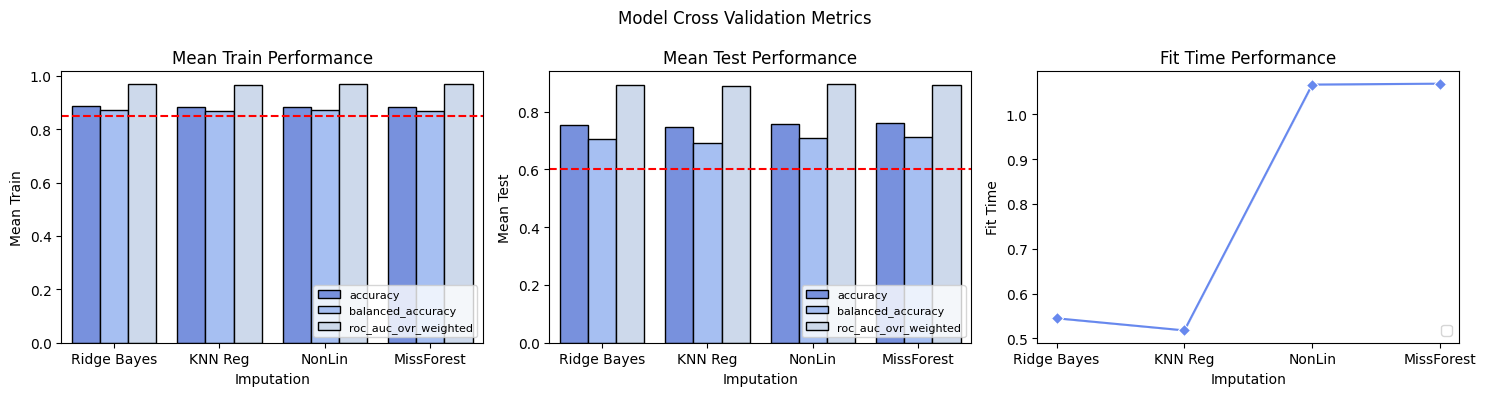

In [12]:
# Filter the metrics you want to plot (Fit Time, Accuracy, Balanced Accuracy, ROC AUC)
metrics_to_plot = ['accuracy', 'balanced_accuracy', 'roc_auc_ovr_weighted']
filtered_df_validation = validation_df[validation_df['Metric'].isin(metrics_to_plot)]
filtered_df_validation

sns.set_palette("coolwarm")
fig, axs = plt.subplots(1,3, figsize = (15, 4))

plt.suptitle("Model Cross Validation Metrics")
sns.barplot(data=filtered_df_validation, x='Imputation', y='Mean Train', hue='Metric', edgecolor='black', ax = axs[0])
axs[0].legend(loc="lower right",  fontsize=8)
axs[0].axhline(y=0.85, color='red', linestyle='--', linewidth=1.5) 
axs[0].set_title("Mean Train Performance")

sns.barplot(data=filtered_df_validation, x='Imputation', y='Mean Test', hue='Metric', edgecolor='black', ax = axs[1])
axs[1].legend(loc="lower right",  fontsize=8)
axs[1].axhline(y=0.60, color="red", linestyle="--", linewidth=1.5)
axs[1].set_title("Mean Test Performance")

sns.lineplot(data=filtered_df_validation, x='Imputation', y=filtered_df_validation['Fit Time'], marker="D", ax = axs[2])
axs[2].legend(loc="lower right")
axs[2].set_title("Fit Time Performance")

plt.tight_layout()

### Evaluate

In [13]:
from sklearn.utils import resample

def bootstrap_ci(model, X, y, metric_fn, n_iterations, ci=0.95, use_proba=False):
    scores = []
    n = len(X)
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X, y, n_samples=n, stratify=y)
        try:
            y_pred = model.predict_proba(X_resampled) if use_proba else model.predict(X_resampled)
            score = metric_fn(y_resampled, y_pred)
            if not np.isnan(score):
                scores.append(score)
        except Exception:
            # Skip this bootstrap sample if error occurs (e.g. missing class for roc_auc)
            continue
    if len(scores) == 0:
        return (np.nan, np.nan)
    lower = np.percentile(scores, (1 - ci) / 2 * 100)
    upper = np.percentile(scores, (1 + ci) / 2 * 100)
    std_dev = np.std(scores)
    return round(lower, 3), round(upper, 3), round(std_dev, 3)

In [14]:
from sklearn.metrics import confusion_matrix

def compute_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    total = cm.sum()
    tp = np.diag(cm)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = total - (tp + fp + fn)
    specificity = tn / (tn + fp)
    return round(np.nanmean(specificity), 3)

In [15]:
import time

def eval_random_forest(classifier_name, imp_method, model, X_train, X_test, y_train, y_test):
        
        start_time = time.time()
        # Get predicted probabilities for ROC AUC
        pred_train_proba = model.predict_proba(X_train)
        pred_test_proba = model.predict_proba(X_test)
        
        # Get predicted accuracy values
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        
        metrics_train = {
                "accuracy": accuracy_score(y_train, pred_train),
                "balanced_accuracy": balanced_accuracy_score(y_train, pred_train),
                "precision_macro": precision_score(y_train, pred_train, average="macro", zero_division=0),
                "recall_macro": recall_score(y_train, pred_train, average="macro", zero_division=0),
                "f1_macro": f1_score(y_train, pred_train, average="macro", zero_division=0),
                "roc_auc_macro": roc_auc_score(y_train, pred_train_proba, average="macro", multi_class="ovr"),
                "specificity_macro": compute_specificity(y_train, pred_train),
        }

        metrics_test = {
                "accuracy": accuracy_score(y_test, pred_test),
                "balanced_accuracy": balanced_accuracy_score(y_test, pred_test),
                "precision_macro": precision_score(y_test, pred_test, average="macro", zero_division=0),
                "recall_macro": recall_score(y_test, pred_test, average="macro", zero_division=0),
                "f1_macro": f1_score(y_test, pred_test, average="macro", zero_division=0),
                "roc_auc_macro": roc_auc_score(y_test, pred_test_proba, average="macro", multi_class="ovr"),
                "specificity_macro": compute_specificity(y_test, pred_test),
        }
                
        elapsed_time = time.time() - start_time

        # Bootstrap functions
        metric_fns = {
                "accuracy": accuracy_score,
                "balanced_accuracy": balanced_accuracy_score,
                "precision_macro": lambda yt, yp: precision_score(yt, yp, average="macro", zero_division=0),
                "recall_macro": lambda yt, yp: recall_score(yt, yp, average="macro", zero_division=0),
                "f1_macro": lambda yt, yp: f1_score(yt, yp, average="macro", zero_division=0),
                "roc_auc_macro": lambda yt, yp: roc_auc_score(yt, yp, average="macro", multi_class="ovr"),
                "specificity_macro": lambda yt, yp: compute_specificity(yt, yp),
        }

        # Bootstrap confidence intervals
        ci_test = {
                m: bootstrap_ci(
                model, X_test, y_test, fn,
                n_iterations=100,
                use_proba=(m == "roc_auc_macro")
                )
                for m, fn in metric_fns.items()
        }

        # Separate CI bounds and std with clear variable names
        ci_bounds = []
        std_values = []
                
        for lower, upper, std in ci_test.values():
                ci_bounds.append(f"[{round(lower, 3)}, {round(upper, 3)}]")
                std_values.append(round(std, 3)) 
                
        # Round metric values
        train_rounded = [round(score, 3) for score in metrics_train.values()]
        test_rounded = [round(score, 3) for score in metrics_test.values()] 

        
        # Create the DataFrame without additional rounding
        pred_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Imputation": imp_method,
                "Classification Time": round(elapsed_time, 3),
                "Metric": metrics_train.keys(),
                "Train data": train_rounded,
                "Test data": test_rounded,
                "95% CI": ci_bounds,
                "Std Dev": std_values,
    })
        
        return pred_metrics_df

In [16]:
pred_bayes = eval_random_forest("Random Forest", "Ridge Bayes", bayes_model, X_train_bayes_t, X_test_bayes_t, y_train, y_test)
pred_knn = eval_random_forest("Random Forest", "KNN Reg", knn_model, X_train_knn_t, X_test_knn_t, y_train, y_test)
pred_nonLin = eval_random_forest("Random Forest", "NonLin", nonLin_model, X_train_nonLin_t, X_test_nonLin_t, y_train, y_test)
pred_missForest = eval_random_forest("Random Forest", "MissForest", missForest_model, X_train_missForest_t, X_test_missForest_t, y_train, y_test)

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def plot_imputer_roc(models_dict, X_tests, y_test, show_per_class=False):
    """
    Plot ROC curves per imputation method using sklearn's roc_auc_score for macro-AUC.
    
    Args:
        models_dict (dict): Dictionary of models {imputer_name: trained_model}
        X_tests (dict): Dictionary of test sets {imputer_name: X_test}
        y_test (array-like): True labels
        show_per_class (bool): Whether to plot ROC for each class
    """
    classes = sorted(np.unique(y_test))
    y_test_bin = label_binarize(y_test, classes=classes)  # One-hot encode
    
    plt.figure(figsize=(8,6))
    
    for imp, model in models_dict.items():
        X_test = X_tests[imp]
        y_proba = model.predict_proba(X_test)
        
        # Compute per-class ROC
        fpr = dict()
        tpr = dict()
        aucs = []
        for i in range(len(classes)):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            aucs.append(auc(fpr[i], tpr[i]))
            
            # Optional: plot per-class curve
            if show_per_class:
                plt.plot(fpr[i], tpr[i], linestyle='--', alpha=0.3, label=f'{imp} - Class {classes[i]}')
        
        # Compute official macro-AUC using sklearn
        auc_macro = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
        
        # Compute macro-average TPR for smooth plotting
        fpr_macro = np.linspace(0, 1, 100)
        tpr_macro = np.mean([np.interp(fpr_macro, fpr[i], tpr[i]) for i in range(len(classes))], axis=0)
        
        plt.plot(fpr_macro, tpr_macro, linewidth=2, label=f'{imp} (AUC={auc_macro:.3f})')
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves per Imputer (Merged)")
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()


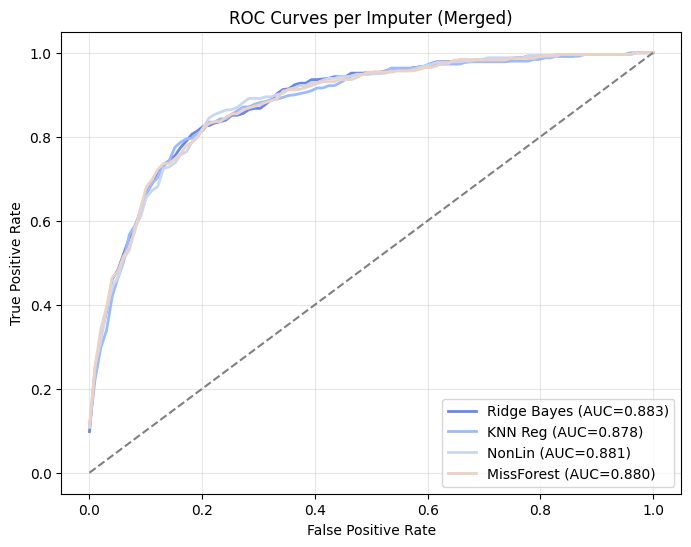

In [18]:
models_dict = {
    "Ridge Bayes": bayes_model,
    "KNN Reg": knn_model,
    "NonLin": nonLin_model,
    "MissForest": missForest_model
}

X_tests = {
    "Ridge Bayes": X_test_bayes_t,
    "KNN Reg": X_test_knn_t,
    "NonLin": X_test_nonLin_t,
    "MissForest": X_test_missForest_t
}

plot_imputer_roc(models_dict, X_tests, y_test)


In [19]:
prediction_df = pd.concat([pred_bayes, pred_knn, pred_nonLin, pred_missForest])
prediction_df_report = prediction_df.set_index(["Classifier", "Imputation",	"Classification Time", "Metric"])
prediction_df_report

Train data  \
Classifier    Imputation  Classification Time Metric                          
Random Forest Ridge Bayes 0.629               accuracy                0.871   
                                              balanced_accuracy       0.858   
                                              precision_macro         0.845   
                                              recall_macro            0.858   
                                              f1_macro                0.851   
                                              roc_auc_macro           0.965   
                                              specificity_macro       0.930   
              KNN Reg     0.316               accuracy                0.874   
                                              balanced_accuracy       0.858   
                                              precision_macro         0.848   
                                              recall_macro            0.858   
                                              f1_macro                0.853   
                                              roc_auc_macro           0.966   
                                              specificity_macro       0.932   
              NonLin      0.249               accuracy                0.872   
                                              balanced_accuracy       0.864   
                                              precision_macro         0.847   
                                              recall_macro            0.864   
                                              f1_macro                0.854   
                                              roc_auc_macro           0.965   
                                              specificity_macro       0.932   
              MissForest  0.169               accuracy                0.867   
                                              balanced_accuracy       0.856   
                                              precision_macro         0.841   
                                              recall_macro            0.856   
                                              f1_macro                0.847   
                                              roc_auc_macro           0.964   
                                              specificity_macro       0.929   

                                                                 Test data  \
Classifier    Imputation  Classification Time Metric                         
Random Forest Ridge Bayes 0.629               accuracy               0.769   
                                              balanced_accuracy      0.710   
                                              precision_macro        0.709   
                                              recall_macro           0.710   
                                              f1_macro               0.709   
                                              roc_auc_macro          0.883   
                                              specificity_macro      0.869   
              KNN Reg     0.316               accuracy               0.766   
                                              balanced_accuracy      0.718   
                                              precision_macro        0.707   
                                              recall_macro           0.718   
                                              f1_macro               0.712   
                                              roc_auc_macro          0.878   
                                              specificity_macro      0.870   
              NonLin      0.249               accuracy               0.761   
                                              balanced_accuracy      0.717   
                                              precision_macro        0.703   
                                              recall_macro           0.717   
                                              f1_macro               0.710   
                                              roc_auc_ma

C:\Users\steve\AppData\Local\Temp\ipykernel_15088\169164776.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend(loc="lower right")


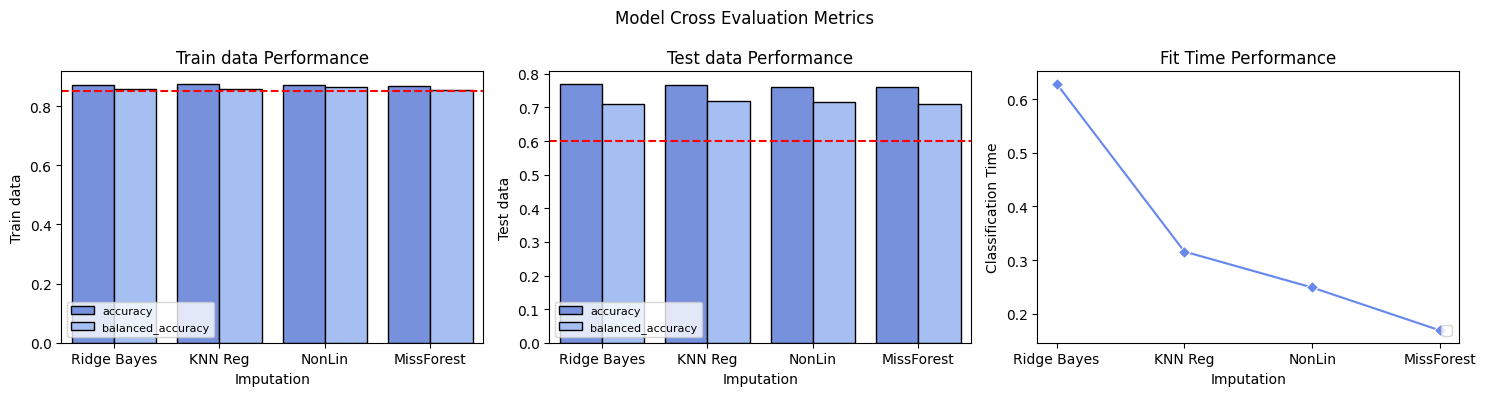

In [20]:
# Filter the metrics you want to plot (Fit Time, Accuracy, Balanced Accuracy, ROC AUC)
metrics_to_plot = ['accuracy', 'balanced_accuracy', 'roc_auc_ovr_weighted']
filtered_df_evaluation = prediction_df[prediction_df['Metric'].isin(metrics_to_plot)]
filtered_df_evaluation

sns.set_palette("coolwarm")
fig, axs = plt.subplots(1,3, figsize = (15, 4))

plt.suptitle("Model Cross Evaluation Metrics")
sns.barplot(data=filtered_df_evaluation, x='Imputation', y='Train data', hue='Metric', edgecolor='black', ax = axs[0])
axs[0].legend(loc="lower left",  fontsize=8)
axs[0].axhline(y=0.85, color='red', linestyle='--', linewidth=1.5) 
axs[0].set_title("Train data Performance")

sns.barplot(data=filtered_df_evaluation, x='Imputation', y='Test data', hue='Metric', edgecolor='black', ax = axs[1])
axs[1].legend(loc="lower left",  fontsize=8)
axs[1].axhline(y=0.60, color="red", linestyle="--", linewidth=1.5)
axs[1].set_title("Test data Performance")

sns.lineplot(data=filtered_df_evaluation, x='Imputation', y=filtered_df_evaluation['Classification Time'], marker="D", ax = axs[2])
axs[2].legend(loc="lower right")
axs[2].set_title("Fit Time Performance")

plt.tight_layout()